In [33]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [7]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

# Zip the lats and lngs together
lat_lngs = zip(lats, lngs)

# Run lat_lngs
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combinations
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(len(cities))

631


In [11]:
# Import requests library
import requests

# Import the weather api key
from config import weather_api_key

# Import the datetime module from the datetime library
from datetime import datetime

In [12]:
# Build the URL for Weather Map API Call
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key

print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=66699ca32d5a652c8df258ce8de7c9a8


In [13]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + '&q=' + city
    
    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
        
    # If an error is experienced, skip the city
    except:
        print('City not found. Skipping...')
        pass
    
# Indicated that Data Loading is complete
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | novozybkov
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | garoua
Processing Record 6 of Set 1 | hurricane
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | nabire
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | murgab
Processing Record 12 of Set 1 | comodoro rivadavia
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | tual
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | pangai
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | mataura
Pr

In [14]:
# Print len for city_data
print(len(city_data))

578


In [15]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.97,-42.03,78.80,78,75,6.93,BR,2020-04-01 17:42:14
1,Cidreira,-30.18,-50.21,76.03,77,88,18.10,BR,2020-04-01 17:42:14
2,Novozybkov,52.54,31.93,39.20,41,89,11.18,RU,2020-04-01 17:42:14
3,Rikitea,-23.12,-134.97,78.66,73,27,4.68,PF,2020-04-01 17:42:15
4,Garoua,9.30,13.40,104.00,26,72,9.17,CM,2020-04-01 17:42:15


In [16]:
# Reorder the columns 
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

# ASsign it to the Dataframe
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2020-04-01 17:42:14,-22.97,-42.03,78.80,78,75,6.93
1,Cidreira,BR,2020-04-01 17:42:14,-30.18,-50.21,76.03,77,88,18.10
2,Novozybkov,RU,2020-04-01 17:42:14,52.54,31.93,39.20,41,89,11.18
3,Rikitea,PF,2020-04-01 17:42:15,-23.12,-134.97,78.66,73,27,4.68
4,Garoua,CM,2020-04-01 17:42:15,9.30,13.40,104.00,26,72,9.17


In [17]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [18]:
# Extrat relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

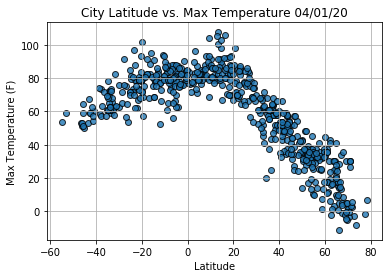

In [19]:
# Import time
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = 'black', linewidths = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

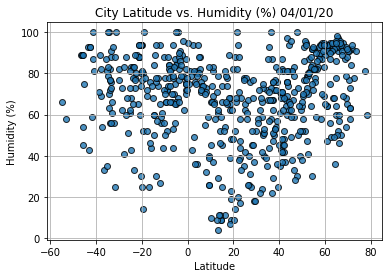

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
           humidity, 
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%) ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show the plot
plt.show()

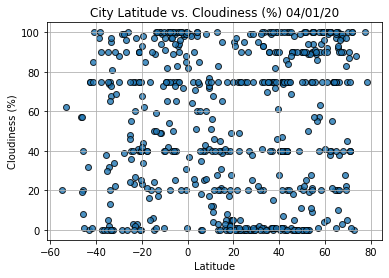

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
           cloudiness,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

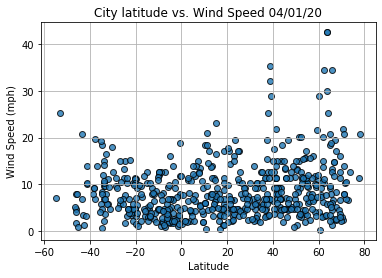

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
           wind_speed, 
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f'City latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

In [51]:
# Create a function to create perform linear regression on the weather
# and plot a regression line and the equation with the date
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values, edgecolor = 'black', linewidths = 1, alpha = 0.8)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f'Slope = {slope}, Intercept = {intercept}, r-value = {r_value}, p-value = {p_value}, Standard Error = {std_err}')

In [30]:
# Testing out df.loc
index13 = city_data_df.loc[13]
index13

City                         Tual
Country                        ID
Date          2020-04-01 17:42:17
Lat                         -5.67
Lng                        132.75
Max Temp                    83.55
Humidity                       75
Cloudiness                     99
Wind Speed                   9.48
Name: 13, dtype: object

In [31]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

In [35]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Novozybkov,RU,2020-04-01 17:42:14,52.54,31.93,39.20,41,89,11.18
4,Garoua,CM,2020-04-01 17:42:15,9.30,13.40,104.00,26,72,9.17
5,Hurricane,US,2020-04-01 17:42:15,37.18,-113.29,64.00,29,15,11.41
6,Severo-Kurilsk,RU,2020-04-01 17:42:15,50.68,156.12,35.01,93,100,13.27
9,Murgab,TM,2020-04-01 17:42:16,37.50,61.97,60.80,67,0,6.93


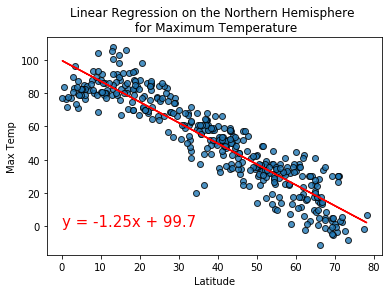

Slope = -1.2467367970513763, Intercept = 99.70183506506928, r-value = -0.9192331683596997, p-value = 1.5672236504999245e-157, Standard Error = 0.027249834729382298


In [52]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (0, 0))

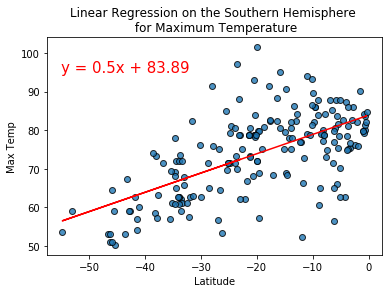

Slope = 0.5004702075128412, Intercept = 83.89268100970867, r-value = 0.6212966458482614, p-value = 6.926616688236484e-22, Standard Error = 0.045791327913221214


In [53]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-55, 95))

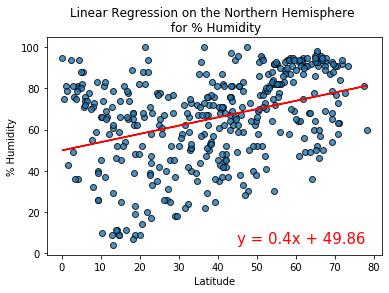

Slope = 0.40187061671683194, Intercept = 49.86139197980691, r-value = 0.3650960565353803, p-value = 1.292200612283865e-13, Standard Error = 0.05229366945302023


In [57]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (45, 5))

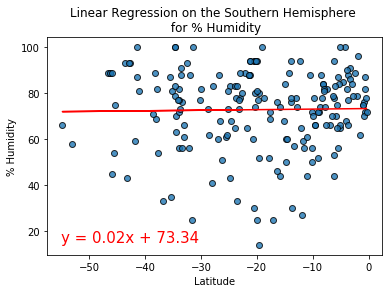

Slope = 0.024485104685629446, Intercept = 73.3357196639519, r-value = 0.018703083332050993, p-value = 0.7968022699994379, Standard Error = 0.09495896737728297


In [59]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-55, 15))

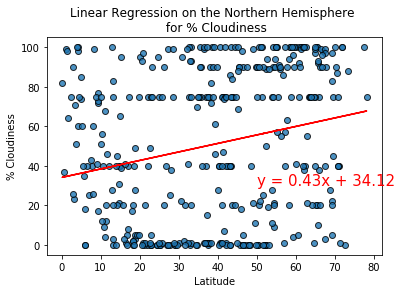

Slope = 0.4298857653496964, Intercept = 34.12051297610854, r-value = 0.229067161479305, p-value = 5.455769557385651e-06, Standard Error = 0.09322248992237671


In [61]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (50, 30))

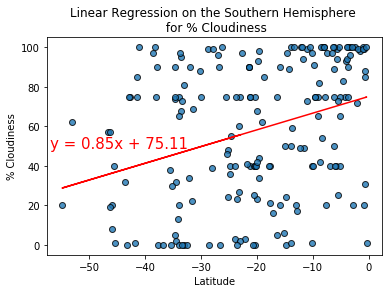

Slope = 0.845133097396933, Intercept = 75.10844960822004, r-value = 0.32326398718642374, p-value = 4.798217479941693e-06, Standard Error = 0.17948322938201783


In [67]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-57, 49))

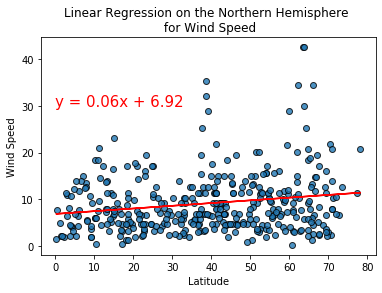

Slope = 0.05797428929621128, Intercept = 6.918105525951042, r-value = 0.18409240032901017, p-value = 0.0002766501530308531, Standard Error = 0.015796004428010595


In [70]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (0, 30))

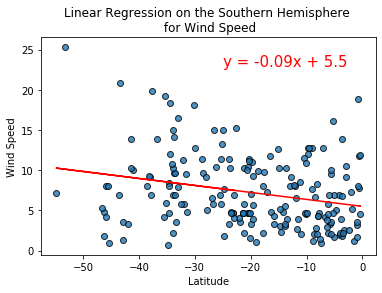

Slope = -0.08695110907737684, Intercept = 5.49590017561561, r-value = -0.2562329994161805, p-value = 0.000334040827073153, Standard Error = 0.02379670444029946


In [75]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-25, 23))